# CUSTOMER RETENTION CASE STUDY PROJECT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [8]:
df=pd.read_excel('customer_retention_dataset.xlsx')

In [9]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [10]:
np.where(pd.isnull(df))[0]

array([], dtype=int64)

In [11]:
df.drop(list(np.where(pd.isnull(df))[0]),inplace=True)

In [12]:
df.shape

(269, 71)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [14]:
df.shape

(269, 71)

In [15]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [16]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [17]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

Summary statistics

In [18]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


Data Visualization

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

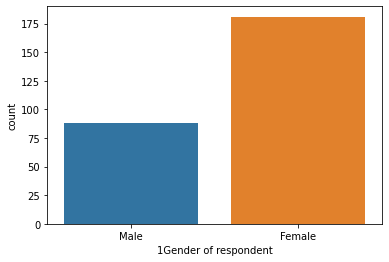

In [19]:
sns.countplot(df['1Gender of respondent'])

<AxesSubplot:xlabel='2 How old are you? ', ylabel='count'>

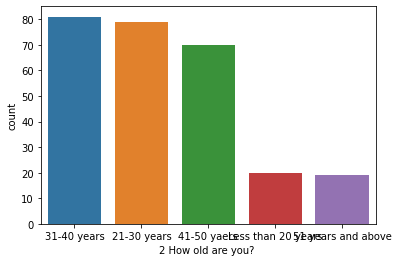

In [20]:
sns.countplot(df['2 How old are you? '])

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

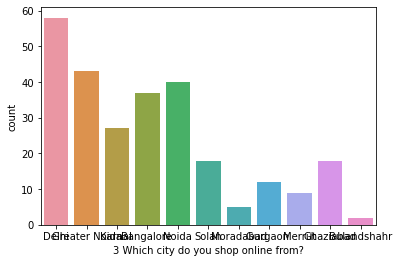

In [21]:
sns.countplot(df['3 Which city do you shop online from?'])

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='count'>

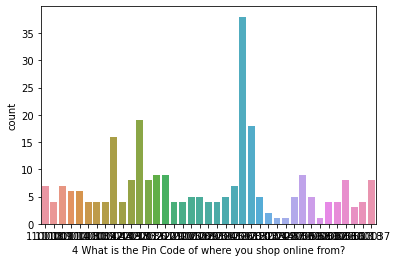

In [22]:
sns.countplot(df['4 What is the Pin Code of where you shop online from?'])

<AxesSubplot:>

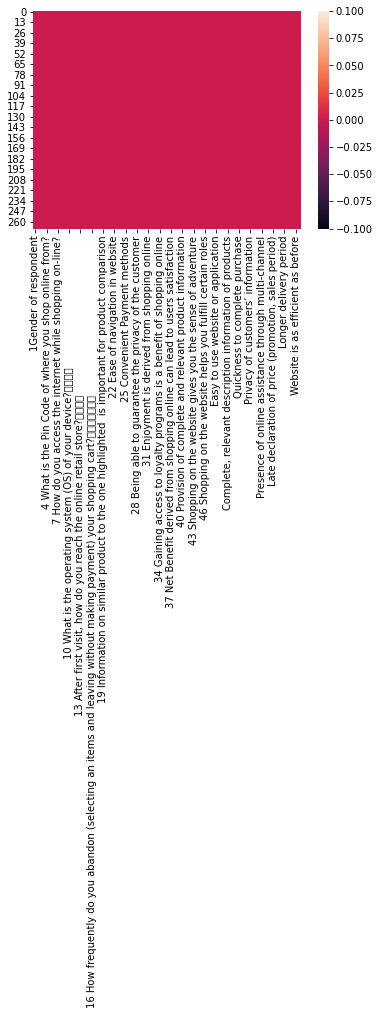

In [23]:
sns.heatmap(df.isnull())

In [24]:
dfcor=df.corr()
dfcor

,4 What is the Pin Code of where you shop online from?
4 What is the Pin Code of where you shop online from?,1.0


<AxesSubplot:>

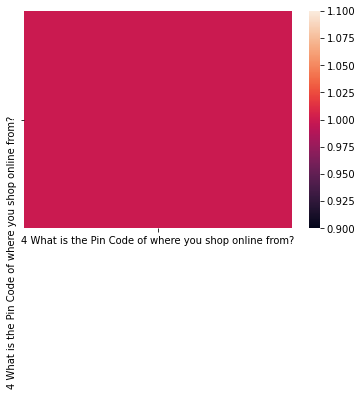

In [25]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

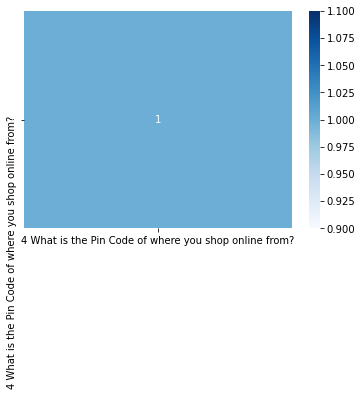

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are highly correlated

<AxesSubplot:>

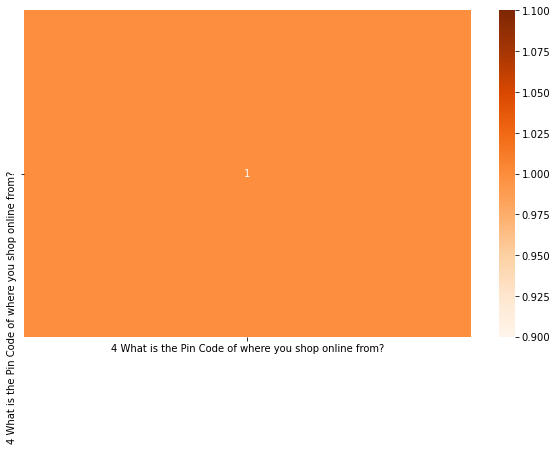

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

# Plotting outliers

In [28]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

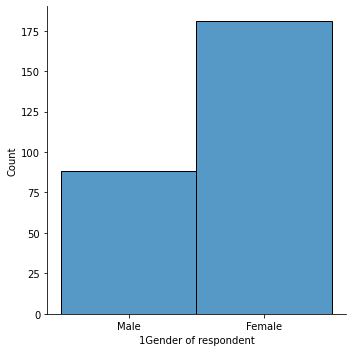

In [29]:
sns.displot(df['1Gender of respondent'])

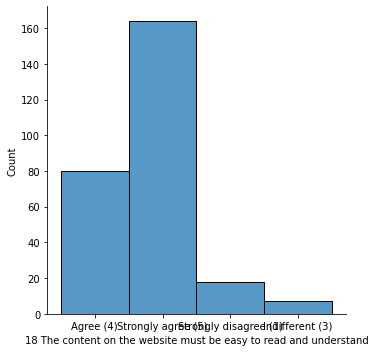

In [30]:
sns.displot(df['18 The content on the website must be easy to read and understand'])

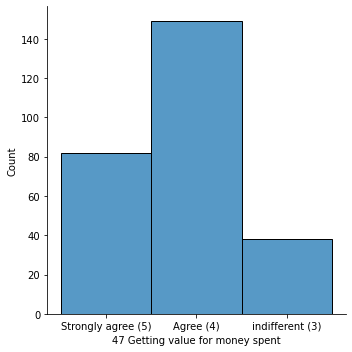

In [31]:
sns.displot(df['47 Getting value for money spent'])

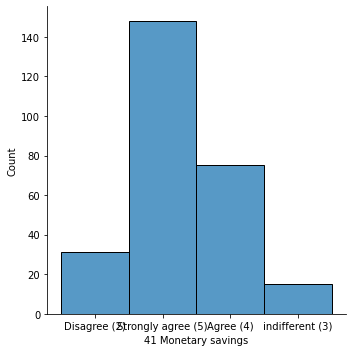

In [32]:
sns.displot(df['41 Monetary savings'])

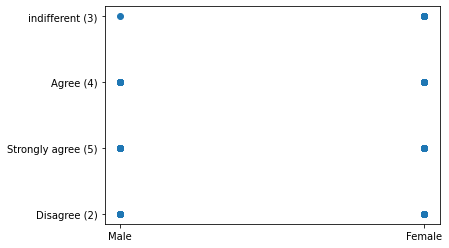

In [33]:
plt.scatter(df['1Gender of respondent'],df['41 Monetary savings'])

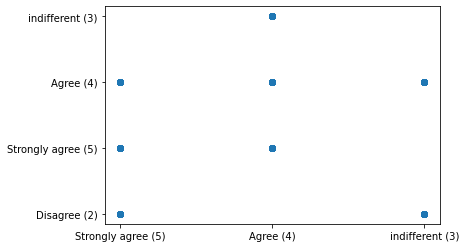

In [34]:
plt.scatter(df['47 Getting value for money spent'],df['41 Monetary savings'])

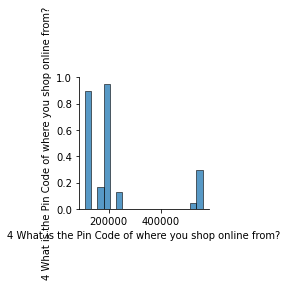

In [35]:
sns.pairplot(df)

Remove the missing values.

drop the nagativitycorrelated columns.

remove the outliers

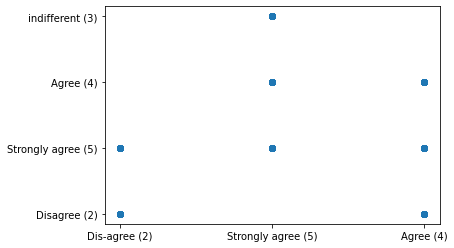

In [36]:
plt.scatter(df['25 Convenient Payment methods'],df['41 Monetary savings'])
plt.show()

In [37]:

df.drop('1Gender of respondent',axis=1,inplace=True)

In [38]:
df.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [39]:
df.shape

(269, 70)

In [40]:
df.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


LabelEncoding and HotEncoding Method

In [41]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['18 The content on the website must be easy to read and understand']=LE.fit_transform(df['18 The content on the website must be easy to read and understand'])


In [42]:
df.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['19 Information on similar product to the one highlighted  is important for product comparison']=LE.fit_transform(df['19 Information on similar product to the one highlighted  is important for product comparison'])


In [44]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['20 Complete information on listed seller and product being offered is important for purchase decision.']=LE.fit_transform(df['20 Complete information on listed seller and product being offered is important for purchase decision.'])


In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['1 All relevant information on listed products must be stated clearly']=LE.fit_transform(df['21 All relevant information on listed products must be stated clearly'])


In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['22 Ease of navigation in website']=LE.fit_transform(df['22 Ease of navigation in website'])
df['23 Loading and processing speed']=LE.fit_transform(df['23 Loading and processing speed'])
df['24 User friendly Interface of the website']=LE.fit_transform(df['24 User friendly Interface of the website'])
df['25 Convenient Payment methods']=LE.fit_transform(df['25 Convenient Payment methods'])

In [47]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['27 Empathy (readiness to assist with queries) towards the customers']=LE.fit_transform(df['27 Empathy (readiness to assist with queries) towards the customers'])
df['28 Being able to guarantee the privacy of the customer']=LE.fit_transform(df['28 Being able to guarantee the privacy of the customer'])
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)']=LE.fit_transform(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])


In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['30 Online shopping gives monetary benefit and discounts']=LE.fit_transform(df['30 Online shopping gives monetary benefit and discounts'])

In [49]:
df['31 Enjoyment is derived from shopping online']=LE.fit_transform(df['31 Enjoyment is derived from shopping online'])

In [50]:
df['32 Shopping online is convenient and flexible']=LE.fit_transform(df['32 Shopping online is convenient and flexible'])

In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['33 Return and replacement policy of the e-tailer is important for purchase decision']=LE.fit_transform(df['33 Return and replacement policy of the e-tailer is important for purchase decision'])
df['34 Gaining access to loyalty programs is a benefit of shopping online']=LE.fit_transform(df['34 Gaining access to loyalty programs is a benefit of shopping online'])
df['35 Displaying quality Information on the website improves satisfaction of customers']=LE.fit_transform(df['35 Displaying quality Information on the website improves satisfaction of customers'])
df['36 User derive satisfaction while shopping on a good quality website or application']=LE.fit_transform(df['36 User derive satisfaction while shopping on a good quality website or application'])


In [52]:
df['37 Net Benefit derived from shopping online can lead to users satisfaction']=LE.fit_transform(df['37 Net Benefit derived from shopping online can lead to users satisfaction'])
df['38 User satisfaction cannot exist without trust']=LE.fit_transform(df['38 User satisfaction cannot exist without trust'])
df['39 Offering a wide variety of listed product in several category']=LE.fit_transform(df['39 Offering a wide variety of listed product in several category'])
df['40 Provision of complete and relevant product information']=LE.fit_transform(df['40 Provision of complete and relevant product information'])
df['41 Monetary savings']=LE.fit_transform(df['41 Monetary savings'])
df['42 The Convenience of patronizing the online retailer']=LE.fit_transform(df['42 The Convenience of patronizing the online retailer'])
df['43 Shopping on the website gives you the sense of adventure']=LE.fit_transform(df['43 Shopping on the website gives you the sense of adventure'])
df['44 Shopping on your preferred e-tailer enhances your social status']=LE.fit_transform(df['44 Shopping on your preferred e-tailer enhances your social status'])
df['45 You feel gratification shopping on your favorite e-tailer']=LE.fit_transform(df['45 You feel gratification shopping on your favorite e-tailer'])
df['46 Shopping on the website helps you fulfill certain roles']=LE.fit_transform(df['46 Shopping on the website helps you fulfill certain roles'])
df['47 Getting value for money spent']=LE.fit_transform(df['47 Getting value for money spent'])

In [53]:
df['Easy to use website or application']=LE.fit_transform(df['Easy to use website or application'])
df['Visual appealing web-page layout']=LE.fit_transform(df['Visual appealing web-page layout']) 
df['Wild variety of product on offer']=LE.fit_transform(df['Wild variety of product on offer'])
df['Complete, relevant description information of products']=LE.fit_transform(df['Complete, relevant description information of products'])
df['Fast loading website speed of website and application']=LE.fit_transform(df['Fast loading website speed of website and application'])
df['Reliability of the website or application']=LE.fit_transform(df['Reliability of the website or application'])
df['Quickness to complete purchase']=LE.fit_transform(df['Quickness to complete purchase'])
df['Availability of several payment options']=LE.fit_transform(df['Availability of several payment options'])
df['Privacy of customers’ information']=LE.fit_transform(df['Privacy of customers’ information'])
df['Security of customer financial information']=LE.fit_transform(df['Security of customer financial information'])
df['Perceived Trustworthiness']=LE.fit_transform(df['Perceived Trustworthiness'])
df['Presence of online assistance through multi-channel']=LE.fit_transform(df['Presence of online assistance through multi-channel'])
df['Longer time to get logged in (promotion, sales period)']=LE.fit_transform(df['Longer time to get logged in (promotion, sales period)'])
df['Longer time in displaying graphics and photos (promotion, sales period)']=LE.fit_transform(df['Longer time in displaying graphics and photos (promotion, sales period)'])
df['Late declaration of price (promotion, sales period)']=LE.fit_transform(df['Late declaration of price (promotion, sales period)'])
df['Longer page loading time (promotion, sales period)']=LE.fit_transform(df['Longer page loading time (promotion, sales period)'])
df['Limited mode of payment on most products (promotion, sales period)']=LE.fit_transform(df['Limited mode of payment on most products (promotion, sales period)'])
df['Longer delivery period']=LE.fit_transform(df['Longer delivery period'])
df['Change in website/Application design']=LE.fit_transform(df['Change in website/Application design'])
df['Frequent disruption when moving from one page to another']=LE.fit_transform(df['Frequent disruption when moving from one page to another'])
df['Website is as efficient as before']=LE.fit_transform(df['Website is as efficient as before'])
      

In [54]:
df.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [55]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Which of the Indian online retailer would you recommend to a friend?']=df['Which of the Indian online retailer would you recommend to a friend?'].replace({'N':0,'Y':1})


In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['3 Which city do you shop online from?']=df['3 Which city do you shop online from?'].replace({'N':0,'Y':1})

In [57]:
df['3 Which city do you shop online from?']=df['3 Which city do you shop online from?'].replace({'N':0,'Y':1})

In [58]:
df['5 Since How Long You are Shopping Online ?']=df['5 Since How Long You are Shopping Online ?'].replace({'N':0,'Y':1})
df['6 How many times you have made an online purchase in the past 1 year?']=df['6 How many times you have made an online purchase in the past 1 year?'].replace({'N':0,'Y':1})
df['7 How do you access the internet while shopping on-line?']=df['7 How do you access the internet while shopping on-line?'].replace({'N':0,'Y':1})
df['8 Which device do you use to access the online shopping?']=df['8 Which device do you use to access the online shopping?'].replace({'N':0,'Y':1})

In [59]:
df.head()

,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [60]:
df.columns

Index(['2 How old are you? ', '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail s

In [61]:
df.drop(['3 Which city do you shop online from?','4 What is the Pin Code of where you shop online from?'],axis=1,inplace=True)

In [62]:
df.head()

,2 How old are you?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [63]:
df.drop(['6 How many times you have made an online purchase in the past 1 year?','7 How do you access the internet while shopping on-line?'],axis=1,inplace=True)


In [64]:
df.head()

,2 How old are you?,5 Since How Long You are Shopping Online ?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Above 4 years,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Above 4 years,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,3-4 years,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,3-4 years,Smartphone,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,2-3 years,Smartphone,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [65]:
df.drop(['8 Which device do you use to access the online shopping?'],axis=1,inplace=True)


In [66]:
df.head()

,2 How old are you?,5 Since How Long You are Shopping Online ?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Above 4 years,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Above 4 years,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,3-4 years,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,3-4 years,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,2-3 years,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [67]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Which of the Indian online retailer would you recommend to a friend?']=df['Which of the Indian online retailer would you recommend to a friend?'].replace({'N':0,'Y':2})


In [68]:
df.head()

,2 How old are you?,5 Since How Long You are Shopping Online ?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,...,"Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,1 All relevant information on listed products must be stated clearly
0,31-40 years,Above 4 years,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,0,3,5,0,3,2,0,0,Flipkart.com,0
1,21-30 years,Above 4 years,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,...,6,7,10,7,5,0,4,1,"Amazon.in, Myntra.com",2
2,21-30 years,3-4 years,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,6,4,7,0,3,5,6,0,"Amazon.in, Paytm.com, Myntra.com",0
3,21-30 years,3-4 years,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,...,7,4,8,5,3,1,1,2,"Amazon.in, Flipkart.com",0
4,21-30 years,2-3 years,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,...,8,5,8,7,3,0,7,6,"Amazon.in, Myntra.com",0


In [69]:
x_train = df.drop(['Which of the Indian online retailer would you recommend to a friend?'],axis=1)
y_train = df.Which of the Indian online retailer would you recommend to a friend?

Object `friend` not found.


In [70]:
x_train.head()

,2 How old are you?,5 Since How Long You are Shopping Online ?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,1 All relevant information on listed products must be stated clearly
0,31-40 years,Above 4 years,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,0,0,3,5,0,3,2,0,0,0
1,21-30 years,Above 4 years,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,...,1,6,7,10,7,5,0,4,1,2
2,21-30 years,3-4 years,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,...,7,6,4,7,0,3,5,6,0,0
3,21-30 years,3-4 years,5.5 inches,IOS/Mac,Safari,Search Engine,Search Engine,6-10 mins,Credit/Debit cards,Never,...,9,7,4,8,5,3,1,1,2,0
4,21-30 years,2-3 years,4.7 inches,IOS/Mac,Safari,Content Marketing,Via application,more than 15 mins,Credit/Debit cards,Frequently,...,5,8,5,8,7,3,0,7,6,0


In [71]:
df_types = ('2 How old are you?','5 Since How Long You are Shopping Online ?','9 What is the screen size of your mobile device?\t\t\t\t\t\t','10 What is the operating system (OS) of your device?\t\t\t\t','11 What browser do you run on your device to access the website?\t\t\t','12 Which channel did you follow to arrive at your favorite online store for the first time?','13 After first visit, how do you reach the online retail store?\t\t\t\t','14 How much time do you explore the e- retail store before making a purchase decision?','15 What is your preferred payment Option?\t\t\t\t\t','16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t','Which of the Indian online retailer would you recommend to a friend?','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t','18 The content on the website must be easy to read and understand','19 Information on similar product to the one highlighted  is important for product comparison','20 Complete information on listed seller and product being offered is important for purchase decision.','21 All relevant information on listed products must be stated clearly','22 Ease of navigation in website','23 Loading and processing speed','24 User friendly Interface of the website','25 Convenient Payment methods','26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time','27 Empathy (readiness to assist with queries) towards the customers','28 Being able to guarantee the privacy of the customer','29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)','30 Online shopping gives monetary benefit and discounts','31 Enjoyment is derived from shopping online','32 Shopping online is convenient and flexible','33 Return and replacement policy of the e-tailer is important for purchase decision34 Gaining access to loyalty programs is a benefit of shopping onlin35 Displaying quality Information on the website improves satisfaction of customers', '36 User derive satisfaction while shopping on a good quality website or application','37 Net Benefit derived from shopping online can lead to users satisfaction','38 User satisfaction cannot exist without trust','39 Offering a wide variety of listed product in several category','40 Provision of complete and relevant product information', '41 Monetary savings''42 The Convenience of patronizing the online retailer', '43 Shopping on the website gives you the sense of adventure','44 Shopping on your preferred e-tailer enhances your social status','45 You feel gratification shopping on your favorite e-tailer','46 Shopping on the website helps you fulfill certain roles','47 Getting value for money spent','Easy to use website or application','Visual appealing web-page layout','Wild variety of product on offer', 'Complete, relevant description information of products','Fast loading website speed of website and application', 'Reliability of the website or application','Quickness to complete purchase','Availability of several payment options','Speedy order delivery ','Privacy of customers’ information','Security of customer financial information','Perceived TrustworthinessPresence of online assistance through multi-channel','Longer time to get logged in (promotion, sales period)','Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)','Longer page loading time (promotion, sales period)','Limited mode of payment on most products (promotion, sales period)','Longer delivery period', 'Change in website/Application design','Frequent disruption when moving from one page to another','Website is as efficient as before', 'Which of the Indian online retailer would you recommend to a friend?','1 All relevant information on listed products must be stated clearly')
df_df=pd.DataFrame(df_types,columns=['df_Types'])
dum_df=pd.get_dummies(df_df,columns=["df_Types"],prefix=["Type_is"])
df_df=df_df.join(dum_df)
df_df

,df_Types,Type_is_1 All relevant information on listed products must be stated clearly,Type_is_10 What is the operating system (OS) of your device?\t\t\t\t,Type_is_11 What browser do you run on your device to access the website?\t\t\t,Type_is_12 Which channel did you follow to arrive at your favorite online store for the first time?,"Type_is_13 After first visit, how do you reach the online retail store?\t\t\t\t",Type_is_14 How much time do you explore the e- retail store before making a purchase decision?,Type_is_15 What is your preferred payment Option?\t\t\t\t\t,Type_is_16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"Type_is_17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t",...,Type_is_Perceived TrustworthinessPresence of online assistance through multi-channel,Type_is_Privacy of customers’ information,Type_is_Quickness to complete purchase,Type_is_Reliability of the website or application,Type_is_Security of customer financial information,Type_is_Speedy order delivery,Type_is_Visual appealing web-page layout,Type_is_Website is as efficient as before,Type_is_Which of the Indian online retailer would you recommend to a friend?,Type_is_Wild variety of product on offer
0,2 How old are you?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5 Since How Long You are Shopping Online ?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9 What is the screen size of your mobile devic...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10 What is the operating system (OS) of your d...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11 What browser do you run on your device to a...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Change in website/Application design,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,Frequent disruption when moving from one page ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,Website is as efficient as before,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,Which of the Indian online retailer would you ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
df_df=pd.DataFrame(df_types,columns=['df_Types'])
dum_df=pd.get_dummies(df_df,columns=["df_Types"],prefix=["Type_is"])
df_df=df_df.join(dum_df)
df_df

,df_Types,Type_is_1 All relevant information on listed products must be stated clearly,Type_is_10 What is the operating system (OS) of your device?\t\t\t\t,Type_is_11 What browser do you run on your device to access the website?\t\t\t,Type_is_12 Which channel did you follow to arrive at your favorite online store for the first time?,"Type_is_13 After first visit, how do you reach the online retail store?\t\t\t\t",Type_is_14 How much time do you explore the e- retail store before making a purchase decision?,Type_is_15 What is your preferred payment Option?\t\t\t\t\t,Type_is_16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"Type_is_17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t",...,Type_is_Perceived TrustworthinessPresence of online assistance through multi-channel,Type_is_Privacy of customers’ information,Type_is_Quickness to complete purchase,Type_is_Reliability of the website or application,Type_is_Security of customer financial information,Type_is_Speedy order delivery,Type_is_Visual appealing web-page layout,Type_is_Website is as efficient as before,Type_is_Which of the Indian online retailer would you recommend to a friend?,Type_is_Wild variety of product on offer
0,2 How old are you?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5 Since How Long You are Shopping Online ?,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9 What is the screen size of your mobile devic...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10 What is the operating system (OS) of your d...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11 What browser do you run on your device to a...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Change in website/Application design,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,Frequent disruption when moving from one page ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,Website is as efficient as before,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
60,Which of the Indian online retailer would you ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Handling The Missing Values

In [73]:
df.isnull().sum()

2 How old are you?                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          0
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                        0
10 What is the operating system (OS) of your device?\t\t\t\t                                                                        0
11 What browser do you run on your device to access the website?\t\t\t                                                              0
                                                                                                                                   ..
Change in website/Application design                                                                                                0
Frequent disruption when moving from one page to another      

In [74]:
df["Change in website/Application design"]=df["Change in website/Application design"].fillna(df["Change in website/Application design"].mean())
df["Website is as efficient as before"]=df["Website is as efficient as before"].fillna(df["Website is as efficient as before"].median())

In [75]:
df.skew()

18 The content on the website must be easy to read and understand                                            -0.570717
19 Information on similar product to the one highlighted  is important for product comparison                -0.277821
20 Complete information on listed seller and product being offered is important for purchase decision.       -0.006110
22 Ease of navigation in website                                                                             -0.207732
23 Loading and processing speed                                                                              -0.012294
24 User friendly Interface of the website                                                                    -1.270908
25 Convenient Payment methods                                                                                -0.613621
27 Empathy (readiness to assist with queries) towards the customers                                           1.105678
28 Being able to guarantee the privacy of the cu

In [76]:
df=pd.get_dummies(df)
df.head()

,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",...,Speedy order delivery _Flipkart.com,"Speedy order delivery _Flipkart.com, Myntra.com, Snapdeal.com",Which of the Indian online retailer would you recommend to a friend?_Amazon.in,"Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com, Myntra.com",Which of the Indian online retailer would you recommend to a friend?_Flipkart.com,"Which of the Indian online retailer would you recommend to a friend?_Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
0,0,2,2,0,4,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,3,3,2,3,3,2,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,3,2,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,2,0,3,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,2,2,0,3,3,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0


Removing Outliers

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.46397934, 0.24071417, 0.3005097 , ..., 0.2834101 , 2.42846369,
        0.20648404],
       [0.56075301, 0.99364569, 1.02877193, ..., 0.2834101 , 0.41178297,
        0.20648404],
       [0.56075301, 1.26514888, 1.15601478, ..., 3.52845575, 0.41178297,
        0.20648404],
       ...,
       [0.56075301, 0.99364569, 1.15601478, ..., 0.2834101 , 0.41178297,
        0.20648404],
       [0.56075301, 1.26514888, 1.02877193, ..., 0.2834101 , 0.41178297,
        0.20648404],
       [0.56075301, 0.99364569, 1.02877193, ..., 0.2834101 , 0.41178297,
        0.20648404]])

In [78]:
threshold=3
print(np.where(z>3))

(array([  0,   1,   2,   2,   4,   5,   6,   6,   7,   7,   8,   8,   8,
         8,  12,  12,  12,  14,  14,  16,  16,  17,  18,  18,  18,  19,
        20,  20,  21,  21,  21,  22,  22,  22,  24,  26,  26,  28,  28,
        30,  30,  31,  32,  33,  33,  34,  35,  36,  37,  37,  38,  38,
        39,  39,  39,  43,  43,  44,  45,  46,  46,  47,  49,  50,  51,
        51,  51,  52,  52,  53,  53,  54,  54,  54,  58,  58,  59,  60,
        61,  61,  61,  64,  64,  65,  65,  65,  66,  67,  68,  68,  70,
        70,  73,  73,  77,  77,  78,  78,  79,  80,  81,  81,  81,  81,
        82,  82,  82,  82,  83,  84,  85,  85,  86,  86,  86,  86,  88,
        88,  88,  88,  88,  89,  89,  94,  94,  95,  96,  97,  97,  97,
        97, 100, 100, 100, 103, 103, 103, 103, 103, 104, 104, 105, 106,
       106, 106, 107, 107, 107, 107, 107, 109, 109, 110, 110, 112, 112,
       112, 112, 112, 112, 113, 114, 115, 115, 116, 117, 118, 118, 118,
       118, 121, 121, 121, 124, 124, 124, 124, 124, 125, 125, 1

In [79]:
df_new=df[(z<3).all(axis=1)]
df_new

,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",...,Speedy order delivery _Flipkart.com,"Speedy order delivery _Flipkart.com, Myntra.com, Snapdeal.com",Which of the Indian online retailer would you recommend to a friend?_Amazon.in,"Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com, Myntra.com",Which of the Indian online retailer would you recommend to a friend?_Flipkart.com,"Which of the Indian online retailer would you recommend to a friend?_Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
3,0,0,2,2,0,3,2,1,1,0,...,0,0,0,1,0,0,0,0,0,0
9,0,3,0,2,3,3,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
10,2,2,0,0,3,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
11,2,3,0,2,0,3,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
13,2,3,4,2,3,3,2,1,1,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2,2,0,0,3,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
256,2,3,0,2,0,3,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
257,0,3,0,2,3,3,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
259,2,3,4,2,3,3,2,1,1,2,...,0,0,0,1,0,0,0,0,0,0


In [80]:
df.shape

(269, 127)

In [81]:
df_new.shape

(89, 127)

New Dataset contains 89 rows and 127 columns

Standard Scaler Method

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [83]:
scaledX

array([[-1.46397934,  0.24071417,  0.3005097 , ..., -0.2834101 ,
         2.42846369, -0.20648404],
       [ 0.56075301,  0.99364569,  1.02877193, ..., -0.2834101 ,
        -0.41178297, -0.20648404],
       [ 0.56075301, -1.26514888, -1.15601478, ...,  3.52845575,
        -0.41178297, -0.20648404],
       ...,
       [ 0.56075301,  0.99364569, -1.15601478, ..., -0.2834101 ,
        -0.41178297, -0.20648404],
       [ 0.56075301, -1.26514888,  1.02877193, ..., -0.2834101 ,
        -0.41178297, -0.20648404],
       [ 0.56075301,  0.99364569,  1.02877193, ..., -0.2834101 ,
        -0.41178297, -0.20648404]])

In [84]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [85]:
Y.explained_variance_ratio_

array([1.01319145e-01, 9.74370207e-02, 9.25384145e-02, 8.07296136e-02,
       7.21449775e-02, 6.25696579e-02, 5.49905842e-02, 5.07011319e-02,
       4.32997617e-02, 4.09390279e-02, 3.69200586e-02, 3.48540038e-02,
       3.15332683e-02, 2.96074270e-02, 2.79172585e-02, 2.28018630e-02,
       2.08468986e-02, 1.86901527e-02, 1.51903409e-02, 1.35819402e-02,
       9.59303334e-03, 7.56478565e-03, 6.76195077e-03, 6.43456924e-03,
       5.78761200e-03, 4.85169965e-03, 3.85330146e-03, 3.53669405e-03,
       1.77693747e-03, 7.10603379e-04, 3.49840357e-04, 1.66426597e-04,
       6.10642648e-32, 1.84467151e-32, 1.29271920e-32, 1.26064878e-32,
       1.08220779e-32, 1.02411045e-32, 8.81496447e-33, 8.06932922e-33,
       7.25002663e-33, 6.29556549e-33, 5.86219948e-33, 4.74432159e-33,
       4.47867888e-33, 4.37440652e-33, 3.20078236e-33, 2.74244410e-33,
       2.06194896e-33, 1.60188908e-33, 1.26315914e-33, 1.25427881e-33,
       7.60604671e-34, 6.86031850e-34, 6.86031850e-34, 6.86031850e-34,
      

In [86]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 10.13191446,  19.87561653,  29.12945798,  37.20241934,
        44.41691709,  50.67388288,  56.17294131,  61.2430545 ,
        65.57303067,  69.66693346,  73.35893932,  76.8443397 ,
        79.99766653,  82.95840923,  85.75013507,  88.03032137,
        90.11501123,  91.98402649,  93.50306058,  94.8612546 ,
        95.82055794,  96.5770365 ,  97.25323158,  97.8966885 ,
        98.4754497 ,  98.96061967,  99.34594982,  99.69961922,
        99.87731297,  99.9483733 ,  99.98335734, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  

In [87]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 26


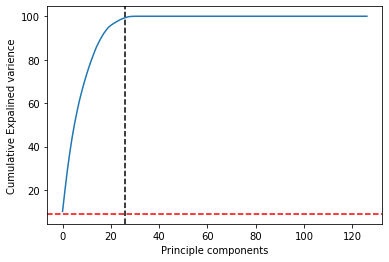

In [88]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Feature Engeneering Model

In [89]:
x_train = df.drop(['28 Being able to guarantee the privacy of the customer'],axis=1)
y_train = df["28 Being able to guarantee the privacy of the customer"]

In [90]:
x_train.head()

,18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,27 Empathy (readiness to assist with queries) towards the customers,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,...,Speedy order delivery _Flipkart.com,"Speedy order delivery _Flipkart.com, Myntra.com, Snapdeal.com",Which of the Indian online retailer would you recommend to a friend?_Amazon.in,"Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Flipkart.com, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Myntra.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com","Which of the Indian online retailer would you recommend to a friend?_Amazon.in, Paytm.com, Myntra.com",Which of the Indian online retailer would you recommend to a friend?_Flipkart.com,"Which of the Indian online retailer would you recommend to a friend?_Flipkart.com, Paytm.com, Myntra.com, snapdeal.com"
0,0,2,2,0,4,1,1,1,0,4,...,0,0,0,0,0,0,0,0,1,0
1,2,3,3,2,3,3,2,1,1,2,...,0,0,0,0,0,1,0,0,0,0
2,2,0,0,0,0,3,2,1,1,2,...,0,0,0,0,0,0,0,1,0,0
3,0,0,2,2,0,3,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,2,2,0,3,3,2,1,1,2,...,0,0,0,0,0,1,0,0,0,0


In [91]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: 28 Being able to guarantee the privacy of the customer, dtype: int32

In [92]:
x_train.shape

(269, 126)

In [93]:
y_train.shape

(269,)

Classification Method

In [94]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [95]:
x= df.drop(['28 Being able to guarantee the privacy of the customer'],axis=1)
y= df["28 Being able to guarantee the privacy of the customer"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [96]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

100.0 at random_state 0
100.0 at random_state 1
100.0 at random_state 2
100.0 at random_state 3
100.0 at random_state 4
100.0 at random_state 5
100.0 at random_state 6
100.0 at random_state 7
100.0 at random_state 8
100.0 at random_state 9
100.0 at random_state 10
100.0 at random_state 11
100.0 at random_state 12
100.0 at random_state 13
100.0 at random_state 14
100.0 at random_state 15
100.0 at random_state 16
100.0 at random_state 17
100.0 at random_state 18
100.0 at random_state 19
100.0 at random_state 20
100.0 at random_state 21
100.0 at random_state 22
100.0 at random_state 23
100.0 at random_state 24
100.0 at random_state 25
100.0 at random_state 26
100.0 at random_state 27
100.0 at random_state 28
100.0 at random_state 29
100.0 at random_state 30
100.0 at random_state 31
100.0 at random_state 32
100.0 at random_state 33
100.0 at random_state 34
100.0 at random_state 35
100.0 at random_state 36
100.0 at random_state 37
100.0 at random_state 38
100.0 at random_state 39
100.0 at r

In [97]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)   

Best accuracy is 1.0  on Random_state 1


In [98]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        10

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Test Accuracy:100.0%


The test Accuracy of DecisionTressClassifier is 100.0%

In [99]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        10

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Test Accuracy:100.0%


In [100]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [101]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       1.00      0.64      0.78        22
           1       0.86      1.00      0.92        49
           2       1.00      1.00      1.00        10

    accuracy                           0.90        81
   macro avg       0.95      0.88      0.90        81
weighted avg       0.92      0.90      0.89        81

Test Accuracy:90.12%


In [102]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        10

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Test Accuracy:100.0%


In [103]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.79      1.00      0.88        22
           1       1.00      0.88      0.93        49
           2       1.00      1.00      1.00        10

    accuracy                           0.93        81
   macro avg       0.93      0.96      0.94        81
weighted avg       0.94      0.93      0.93        81

Test Accuracy:92.59%


In [104]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        10

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81

Test Accuracy:100.0%


The test Accuracy of randomforestclassifier is 100.00%

Cross Value Correction

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
print(cross_val_score(dt,x,y,cv=5).mean())

1.0


In [107]:
print(cross_val_score(lr,x,y,cv=5).mean())

1.0


In [108]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.9481481481481481


In [109]:
print(cross_val_score(svm,x,y,cv=5).mean())

1.0


In [110]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.9218728162124389


In [111]:
print(cross_val_score(rf,x,y,cv=5).mean())

1.0


Hyperparameter Tunning

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [115]:
rf = RandomForestClassifier()

In [116]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [117]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

AUC ROC Curve

In [118]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [119]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.  , 1.  , 0.  , 0.99, 0.  , 1.  , 0.04, 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.03, 1.  , 1.  , 0.03, 1.  , 0.  , 0.  , 1.  , 0.  ,
       1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.03, 1.  , 0.  , 0.  , 0.03,
       1.  , 1.  , 1.  , 0.01, 0.04, 1.  , 1.  , 0.99, 1.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 0.04, 0.99, 0.02, 1.  , 1.  , 0.04, 1.  , 1.  , 1.  ,
       1.  , 0.  , 1.  , 1.  ])

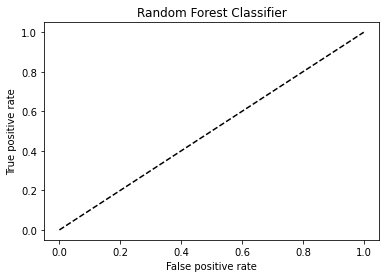

In [120]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

Here the positive and negative value of the Random Forest Classifier curve

Evaluate the Model

In [121]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


Saving the Model

In [122]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here the saving model FinalModle.pkl

Prediction Method

In [123]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 0 1 2 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 2 1 0 1 0 1 1 1 1 0 1 2 2 0 1 1 1]
[0 0 1 2 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 2 1 0 1 0 1 1 1 1 0 1 2 2 0 1 1 1]


The train and test data is balanced most classification methods hit the 86% accuracy with the datset.